In [1]:
import smote_variants as sv

In [2]:
import pandas  as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
import imbalanced_databases as imbd

In [6]:
from sklearn import metrics

In [7]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [8]:
from sklearn.metrics import confusion_matrix

In [9]:
from sklearn import metrics

In [10]:
from sklearn.metrics import plot_roc_curve

In [11]:
from imblearn.over_sampling import SMOTE

In [12]:
%matplotlib inline
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
from sklearn.linear_model import LogisticRegression 

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
from sklearn.svm import SVC

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
import tensorflow.keras

In [21]:
from tensorflow.keras.models import Sequential

In [22]:
from tensorflow.keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense, Input, Dropout, LSTM

In [23]:
from tensorflow.keras.optimizers import Adam

In [24]:
from tensorflow.keras.utils import to_categorical

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
from sklearn.preprocessing import Normalizer

In [27]:
from sklearn.utils import resample

In [28]:
from sklearn.feature_selection import SelectKBest

In [29]:
from sklearn.feature_selection import f_classif

In [30]:
fdata = pd.read_csv("False_Injection_Attack_features.csv", encoding = "ISO-8859-1", header=None)

In [31]:
data_info = fdata.values

In [32]:
features = data_info[1:-2,:]

In [33]:
feature_names = features[:, 1]  

In [34]:
feature_types = np.array([item.lower() for item in features[:, 2]])

In [35]:
dataframe1 = pd.read_csv("False_Injection_Attack_Dataset_1.csv", encoding = "ISO-8859-1", header=None, names=[*feature_names, 'fdia_category','Label'])
dataframe2 = pd.read_csv("False_Injection_Attack_Dataset_2.csv", encoding = "ISO-8859-1", header=None, names=[*feature_names, 'fdia_category','Label'])

s:\anacondaprogramdata\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (1,3,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [36]:
df = pd.concat([dataframe1,  dataframe2])

In [37]:
del dataframe1
del dataframe2

In [38]:
df.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,fdia_category,Label
0,ï»¿59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1140045 entries, 0 to 440043
Data columns (total 49 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   srcip             1140045 non-null  object 
 1   sport             1140045 non-null  object 
 2   dstip             1140045 non-null  object 
 3   dsport            1140045 non-null  object 
 4   proto             1140045 non-null  object 
 5   state             1140045 non-null  object 
 6   dur               1140045 non-null  float64
 7   sbytes            1140045 non-null  int64  
 8   dbytes            1140045 non-null  int64  
 9   sttl              1140045 non-null  int64  
 10  dttl              1140045 non-null  int64  
 11  sloss             1140045 non-null  int64  
 12  dloss             1140045 non-null  int64  
 13  service           1140045 non-null  object 
 14  Sload             1140045 non-null  float64
 15  Dload             1140045 non-null  float64
 16  S

In [40]:
nominal_cols = np.where(feature_types == "nominal")[0]
nominal_names = feature_names[nominal_cols]
nominal_names

array(['srcip', 'dstip', 'proto', 'state', 'service'], dtype=object)

In [41]:
df[nominal_names]

,srcip,dstip,proto,state,service
0,ï»¿59.166.0.0,149.171.126.6,udp,CON,dns
1,59.166.0.0,149.171.126.9,udp,CON,-
2,59.166.0.6,149.171.126.7,udp,CON,dns
3,59.166.0.5,149.171.126.5,udp,CON,dns
4,59.166.0.3,149.171.126.0,udp,CON,dns
...,...,...,...,...,...
440039,59.166.0.5,149.171.126.7,tcp,FIN,ftp-data
440040,59.166.0.7,149.171.126.4,tcp,CON,ftp
440041,59.166.0.3,149.171.126.9,tcp,CON,ftp
440042,59.166.0.9,149.171.126.0,tcp,CON,http


In [42]:
df.drop(['srcip', 'dstip', 'service', 'Label'],axis=1, inplace=True)

In [43]:
df.isna().sum().to_numpy()

array([      0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,  406484,
        433412,       0,       0,       0,       0,       0,       0,
             0,       0, 1028936], dtype=int64)

In [44]:
df.dropna(inplace=True)

In [45]:
df.isna().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [46]:
df["fdia_category"] = df["fdia_category"].fillna('Benign')

In [47]:
df["fdia_category"] = df["fdia_category"].replace(' Fuzzers','Fuzzers')
df["fdia_category"] = df["fdia_category"].replace(' Fuzzers ','Fuzzers')
df["fdia_category"] = df["fdia_category"].replace(' Reconnaissance','Reconnaissance')
df["fdia_category"] = df["fdia_category"].replace(' Reconnaissance ','Reconnaissance')
df["fdia_category"] = df["fdia_category"].replace(' Shellcode','Shellcode')
df["fdia_category"] = df["fdia_category"].replace(' Shellcode ','Shellcode')
df["fdia_category"] = df["fdia_category"].replace('Backdoors','Backdoor')

In [48]:
df['fdia_category'].unique()

array(['Exploits', 'Reconnaissance', 'DoS', 'Generic', 'Shellcode',
       'Fuzzers', 'Worms', 'Backdoor', 'Analysis'], dtype=object)

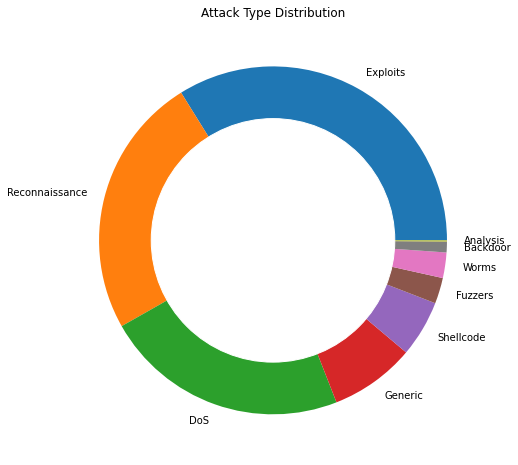

In [49]:
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.title('Attack Type Distribution')
plt.pie(df['fdia_category'].value_counts(), labels=df['fdia_category'].unique())
p = plt.gcf()
p.gca().add_artist(circle)

In [50]:
nominal_cols

array([ 0,  2,  4,  5, 13], dtype=int64)

In [51]:
df.head()

,sport,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,fdia_category
20,21223,32780,udp,INT,0.000021,728,0,254,0,0,...,0.0,0,1,1,1,1,1,1,1,Exploits
21,23357,80,tcp,FIN,0.240139,918,25552,62,252,2,...,0.0,0,3,2,2,1,1,1,1,Exploits
22,13284,80,tcp,FIN,2.390390,1362,268,254,252,6,...,0.0,0,5,2,2,1,1,1,1,Reconnaissance
39,13792,5555,tcp,FIN,0.175190,8168,268,254,252,4,...,0.0,0,1,1,1,1,1,1,1,Exploits
40,26939,80,tcp,FIN,0.190600,844,268,254,252,2,...,0.0,0,3,1,1,1,1,1,1,Exploits


In [52]:
le = LabelEncoder()
df['proto']= le.fit_transform(df['proto'])

In [53]:
le = LabelEncoder()
df['state']= le.fit_transform(df['state'])

In [54]:
le = LabelEncoder()
df['fdia_category']= le.fit_transform(df['fdia_category'])

In [55]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [56]:
df.dropna(inplace=True)

In [57]:
X_A = df.drop(['fdia_category'],axis=1)

In [58]:
y_A =  df['fdia_category']

In [59]:
df['fdia_category'].unique()

array([3, 6, 2, 5, 7, 4, 8, 1, 0])

In [60]:
bestfeatures = SelectKBest(score_func=f_classif, k=10)

In [61]:
fit = bestfeatures.fit(X_A,y_A)

s:\anacondaprogramdata\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [32] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
s:\anacondaprogramdata\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [62]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_A.columns)

In [63]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

In [64]:
featureScores

,0,0
0,sport,214.402678
1,dsport,626.975664
2,proto,440.719481
3,state,1523.178553
4,dur,84.778565
5,sbytes,12.922188
6,dbytes,16.014900
7,sttl,1774.720593
8,dttl,1693.223279
9,sloss,17.155542


In [65]:
featureScores.columns = ['Specs','Score']

In [66]:
print(featureScores.nlargest(30,'Score'))

               Specs        Score
7               sttl  1774.720593
8               dttl  1693.223279
15              swin  1659.966816
16              dwin  1658.268364
3              state  1523.178553
38        ct_srv_dst  1107.554270
33      ct_state_ttl  1041.123353
41  ct_src_dport_ltm  1025.926043
29            tcprtt   986.081523
42  ct_dst_sport_ltm   961.970851
31            ackdat   957.568678
43    ct_dst_src_ltm   950.114391
18             dtcpb   873.947625
39        ct_dst_ltm   867.961290
17             stcpb   861.815623
37        ct_srv_src   838.728071
30            synack   816.326789
1             dsport   626.975664
40       ct_src_ ltm   553.177798
20           dmeansz   509.804877
2              proto   440.719481
25             Stime   378.947677
26             Ltime   377.241891
19           smeansz   253.625117
0              sport   214.402678
34  ct_flw_http_mthd   160.954424
21       trans_depth   151.233170
12             Dload   145.280114
4             

In [67]:
result = featureScores.nlargest(30,'Score')

In [68]:
result

,Specs,Score
7,sttl,1774.720593
8,dttl,1693.223279
15,swin,1659.966816
16,dwin,1658.268364
3,state,1523.178553
38,ct_srv_dst,1107.554270
33,ct_state_ttl,1041.123353
41,ct_src_dport_ltm,1025.926043
29,tcprtt,986.081523
42,ct_dst_sport_ltm,961.970851


In [69]:
df = df[result["Specs"]]

In [70]:
df.head()

,sttl,dttl,swin,dwin,state,ct_srv_dst,ct_state_ttl,ct_src_dport_ltm,tcprtt,ct_dst_sport_ltm,...,proto,Stime,Ltime,smeansz,sport,ct_flw_http_mthd,trans_depth,Dload,dur,Sjit
20,254,0,0,0,4,1,2,1,0.000000,1,...,115,1421927415,1421927415,364,21223,0.0,0,0.000000,0.000021,0.000000
21,62,252,255,255,3,2,1,1,0.051475,1,...,109,1421927416,1421927416,77,23357,1.0,1,815794.187500,0.240139,1170.481668
22,254,252,255,255,3,2,1,1,0.066088,1,...,109,1421927414,1421927416,97,13284,1.0,1,749.668518,2.390390,18786.711400
39,254,252,255,255,3,1,1,1,0.054878,1,...,109,1421927417,1421927417,583,13792,0.0,0,10228.894530,0.175190,774.788316
40,254,252,255,255,3,1,1,1,0.050675,1,...,109,1421927418,1421927418,84,26939,1.0,1,9401.888672,0.190600,996.632407


In [72]:
df["fdia_category"] = y_A

In [73]:
df.head()

,sttl,dttl,swin,dwin,state,ct_srv_dst,ct_state_ttl,ct_src_dport_ltm,tcprtt,ct_dst_sport_ltm,...,Stime,Ltime,smeansz,sport,ct_flw_http_mthd,trans_depth,Dload,dur,Sjit,fdia_category
20,254,0,0,0,4,1,2,1,0.000000,1,...,1421927415,1421927415,364,21223,0.0,0,0.000000,0.000021,0.000000,3
21,62,252,255,255,3,2,1,1,0.051475,1,...,1421927416,1421927416,77,23357,1.0,1,815794.187500,0.240139,1170.481668,3
22,254,252,255,255,3,2,1,1,0.066088,1,...,1421927414,1421927416,97,13284,1.0,1,749.668518,2.390390,18786.711400,6
39,254,252,255,255,3,1,1,1,0.054878,1,...,1421927417,1421927417,583,13792,0.0,0,10228.894530,0.175190,774.788316,3
40,254,252,255,255,3,1,1,1,0.050675,1,...,1421927418,1421927418,84,26939,1.0,1,9401.888672,0.190600,996.632407,3


In [74]:
data_1 = df[df['fdia_category'] == 0]
data_2 = df[df['fdia_category'] == 1]
data_3 = df[df['fdia_category'] == 2]
data_4 = df[df['fdia_category'] == 4]
data_5 = df[df['fdia_category'] == 5]
data_6 = df[df['fdia_category'] == 6]
data_7 = df[df['fdia_category'] == 7]
data_8 = df[df['fdia_category'] == 8]

In [75]:
y_1 = np.zeros(data_1.shape[0])
y_df1 = pd.DataFrame(y_1)

In [76]:
y_2 = np.ones(data_2.shape[0])
y_df2 = pd.DataFrame(y_2)

In [77]:
y_3 = np.full(data_3.shape[0], 2)
y_df3 = pd.DataFrame(y_3)

In [78]:
y_4 = np.full(data_4.shape[0], 3)
y_df4 = pd.DataFrame(y_4)

In [79]:
y_5 = np.full(data_5.shape[0], 4)
y_df5 = pd.DataFrame(y_5)

In [80]:
y_6 = np.full(data_6.shape[0], 5)
y_df6 = pd.DataFrame(y_6)

In [81]:
y_7 = np.full(data_7.shape[0], 6)
y_df7 = pd.DataFrame(y_7)

In [82]:
y_8 = np.full(data_8.shape[0], 7)
y_df8 = pd.DataFrame(y_8)

In [83]:
X = pd.concat([data_1, data_2, data_3,data_4, data_5, data_6,data_7, data_8], sort=True)
y = pd.concat([y_df1, y_df2, y_df3,y_df4, y_df5, y_df6,y_df7, y_df8], sort=True)

In [84]:
print(X.shape)
print(y.shape)

(16806, 31)
(16806, 1)


In [85]:
X.isnull().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [86]:
dfcolumns

,0
0,sport
1,dsport
2,proto
3,state
4,dur
5,sbytes
6,dbytes
7,sttl
8,dttl
9,sloss


In [88]:
data_1_resample = resample(data_1, n_samples=20000, 
                           random_state=123, replace=True)
data_2_resample = resample(data_2, n_samples=20000, 
                           random_state=123, replace=True)
data_3_resample = resample(data_3, n_samples=20000, 
                           random_state=123, replace=True)
data_4_resample = resample(data_4, n_samples=20000, 
                           random_state=123, replace=True)
data_5_resample = resample(data_5, n_samples=20000, 
                           random_state=123, replace=True)
data_6_resample = resample(data_6, n_samples=20000, 
                           random_state=123, replace=True)
data_7_resample = resample(data_7, n_samples=20000, 
                           random_state=123, replace=True)
data_8_resample = resample(data_8, n_samples=20000, 
                           random_state=123, replace=True)


In [89]:
train_dataset = pd.concat([data_1_resample, data_2_resample, data_3_resample, data_4_resample, data_5_resample, data_6_resample, data_7_resample, data_8_resample])
train_dataset.head(2)

,sttl,dttl,swin,dwin,state,ct_srv_dst,ct_state_ttl,ct_src_dport_ltm,tcprtt,ct_dst_sport_ltm,...,Stime,Ltime,smeansz,sport,ct_flw_http_mthd,trans_depth,Dload,dur,Sjit,fdia_category
146657,62,252,255,255,3,5,1,1,0.145472,1,...,1421932854,1421932854,82,56570,0.0,0,18258.04688,0.416693,2363.189831,0
86653,254,0,0,0,4,7,2,2,0.000000,2,...,1421930757,1421930757,100,0,0.0,0,0.00000,0.000011,0.000000,0


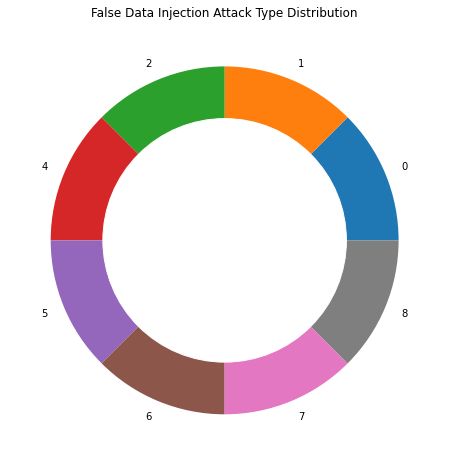

In [90]:
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.title('False Data Injection Attack Type Distribution')
plt.pie(train_dataset['fdia_category'].value_counts(), labels=train_dataset["fdia_category"].unique())
p = plt.gcf()
p.gca().add_artist(circle)

In [91]:
test_dataset = train_dataset.sample(frac=0.1)
target_train = train_dataset['fdia_category']

In [92]:
target_test = test_dataset['fdia_category']
target_train.unique(), target_test.unique()

(array([0, 1, 2, 4, 5, 6, 7, 8]), array([4, 6, 8, 1, 2, 0, 7, 5]))

In [94]:
y_train = to_categorical(target_train, num_classes=9)
y_test = to_categorical(target_test, num_classes=9)

In [95]:
#train_dataset = train_dataset.drop(columns = ["Timestamp", "proto","PSH Flag Cnt","Init Fwd Win Byts","Flow Byts/s","Flow Pkts/s", "attack"], axis=1)

In [96]:
#test_dataset = test_dataset.drop(columns = ["Timestamp", "proto","PSH Flag Cnt","Init Fwd Win Byts","Flow Byts/s","Flow Pkts/s", "attack"], axis=1)

In [97]:
X_train = train_dataset.iloc[:, :-1].values
X_test = test_dataset.iloc[:, :-1].values
X_test

array([[254, 0, 0, ..., 0.0, 8e-06, 0.0],
       [254, 252, 255, ..., 3929.8332520000004, 0.455999, 2410.137893],
       [254, 0, 0, ..., 0.0, 1.1e-05, 0.0],
       ...,
       [254, 0, 0, ..., 0.0, 7.000000000000001e-06, 0.0],
       [254, 0, 0, ..., 0.0, 7.000000000000001e-06, 0.0],
       [254, 0, 0, ..., 0.0, 1e-06, 0.0]], dtype=object)

In [98]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160000, 30)
(16000, 30)
(160000, 9)
(16000, 9)


In [99]:
X_train = X_train.reshape(len(X_train), X_train.shape[1], 1)
X_test = X_test.reshape(len(X_test), X_test.shape[1], 1)
X_train.shape, X_test.shape

((160000, 30, 1), (16000, 30, 1))

In [103]:
def create_nn_model():
    learning_rate=0.001
    batch_size=5000
    model = Sequential()
    model.add(Dense(64, input_shape=(30,), activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(9, activation='softmax'))
    
    adam = Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['accuracy'])
    
    return model

In [104]:
model = create_nn_model()

In [108]:
X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')

In [ ]:
his = model.fit(X_train, y_train, epochs=30, batch_size=32, 
          validation_data=(X_test, y_test))

Epoch 1/30
5000/5000 [==============================] - 5s 1ms/step - loss: 2153510.0000 - accuracy: 0.1966 - val_loss: 1358628.0000 - val_accuracy: 0.1873
Epoch 2/30
5000/5000 [==============================] - 5s 990us/step - loss: 402572.0000 - accuracy: 0.1806 - val_loss: 87.1859 - val_accuracy: 0.1279
Epoch 3/30
5000/5000 [==============================] - 5s 987us/step - loss: 6.9493 - accuracy: 0.1247 - val_loss: 2.0807 - val_accuracy: 0.1251
Epoch 4/30
5000/5000 [==============================] - 5s 978us/step - loss: 2.0801 - accuracy: 0.1246 - val_loss: 2.0797 - val_accuracy: 0.1248
Epoch 5/30
5000/5000 [==============================] - 5s 987us/step - loss: 2.0796 - accuracy: 0.1243 - val_loss: 2.0796 - val_accuracy: 0.1244
Epoch 6/30
5000/5000 [==============================] - 5s 976us/step - loss: 2.0796 - accuracy: 0.1237 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 7/30
5000/5000 [==============================] - 5s 979us/step - loss: 2.0796 - accuracy: 0.1246 - va

In [79]:
y_pred = model.predict(X_test)
AUC = metrics.roc_auc_score(y_test,y_pred)
print("AUC: {:.3f}".format(AUC))

AUC: 0.999


In [80]:
history = his.history
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [81]:
epochs = range(1, len(history['loss']) + 1)
acc = history['accuracy']
loss = history['loss']
val_acc = history['val_accuracy']
val_loss = history['val_loss']

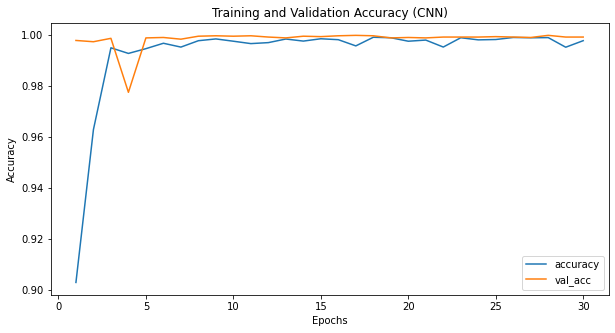

In [82]:
plt.figure(figsize=(10, 5))
plt.title('Training and Validation Accuracy (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_acc')
plt.legend()

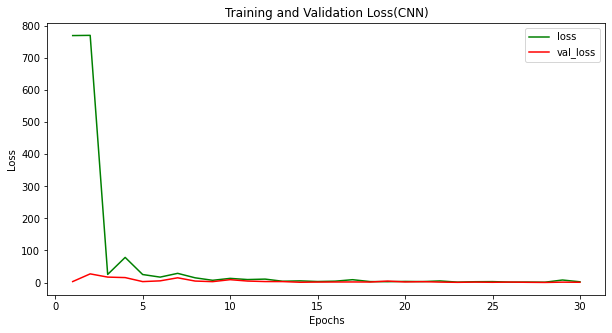

In [83]:
plt.figure(figsize=(10, 5))
plt.title('Training and Validation Loss(CNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, label='loss', color='g')
plt.plot(epochs, val_loss, label='val_loss', color='r')
plt.legend()

In [84]:
def create_lstm_model():
    learning_rate=0.001
    batch_size=5000
    model = Sequential()
    model.add(Dense(64, input_shape=(30,1), activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(LSTM(64, activation='relu'))
    model.add(Dense(9, activation='softmax'))
    
    adam = Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['accuracy'])
    
    return model

In [85]:
model = create_lstm_model()

s:\anacondaprogramdata\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [86]:
his = model.fit(X_train, y_train, epochs=30, batch_size=32, 
          validation_data=(X_test, y_test))

Epoch 1/30
1875/1875 [==============================] - 13s 7ms/step - loss: 15476.4492 - accuracy: 0.4379 - val_loss: 2283.0786 - val_accuracy: 0.4033
Epoch 2/30
1875/1875 [==============================] - 13s 7ms/step - loss: 2443.1282 - accuracy: 0.4665 - val_loss: 627.2682 - val_accuracy: 0.6128
Epoch 3/30
1875/1875 [==============================] - 12s 7ms/step - loss: 2482.8240 - accuracy: 0.4965 - val_loss: 458.3632 - val_accuracy: 0.4388
Epoch 4/30
1875/1875 [==============================] - 12s 7ms/step - loss: 1342.8540 - accuracy: 0.5594 - val_loss: 158.1687 - val_accuracy: 0.6665
Epoch 5/30
1875/1875 [==============================] - 12s 7ms/step - loss: 732.5483 - accuracy: 0.5418 - val_loss: 571.7314 - val_accuracy: 0.5033
Epoch 6/30
1875/1875 [==============================] - 12s 7ms/step - loss: 403.6353 - accuracy: 0.6123 - val_loss: 67.9407 - val_accuracy: 0.5975
Epoch 7/30
1875/1875 [==============================] - 13s 7ms/step - loss: 1089.3835 - accuracy: 0.

In [87]:
y_pred = model.predict(X_test)
AUC = metrics.roc_auc_score(y_test,y_pred)
print("AUC: {:.3f}".format(AUC))

AUC: 0.654


In [88]:
history = his.history
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [89]:
epochs = range(1, len(history['loss']) + 1)
acc = history['accuracy']
loss = history['loss']
val_acc = history['val_accuracy']
val_loss = history['val_loss']

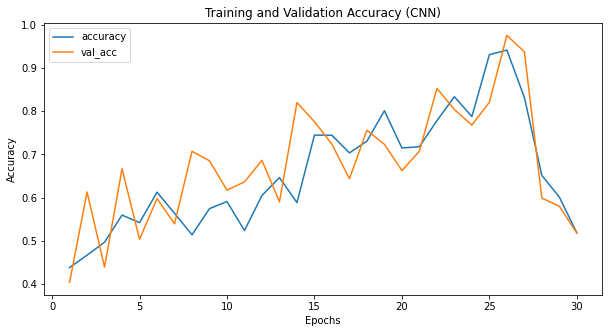

In [90]:
plt.figure(figsize=(10, 5))
plt.title('Training and Validation Accuracy (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_acc')
plt.legend()

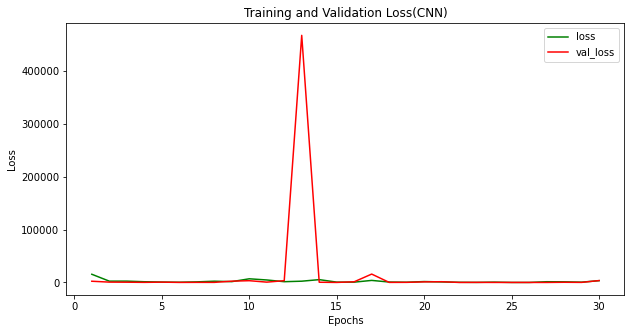

In [91]:
plt.figure(figsize=(10, 5))
plt.title('Training and Validation Loss(CNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, label='loss', color='g')
plt.plot(epochs, val_loss, label='val_loss', color='r')
plt.legend()

In [92]:
def create_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=(30, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=(72, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=(72, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(9, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [93]:
model = create_cnn_model()

In [94]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 30, 64)            448       
                                                                 
 batch_normalization (BatchN  (None, 30, 64)           256       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 15, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 64)            24640     
                                                                 
 batch_normalization_1 (Batc  (None, 15, 64)           256       
 hNormalization)                                                 
                                                      

In [95]:
his = model.fit(X_train, y_train, epochs=30, batch_size=32, 
          validation_data=(X_test, y_test))

Epoch 1/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0521 - accuracy: 0.9841 - val_loss: 0.3582 - val_accuracy: 0.8183
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0131 - accuracy: 0.9971 - val_loss: 0.9524 - val_accuracy: 0.8130
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0157 - accuracy: 0.9963 - val_loss: 0.1634 - val_accuracy: 0.8233
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0072 - accuracy: 0.9984 - val_loss: 0.5059 - val_accuracy: 0.7705
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0087 - accuracy: 0.9980 - val_loss: 0.5542 - val_accuracy: 0.7787
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0105 - accuracy: 0.9980 - val_loss: 0.0592 - val_accuracy: 0.9988
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0052 - accuracy: 0.9990 - val_loss: 0.0248 - val_accuracy:

In [96]:
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

188/188 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 0.9997
accuracy: 99.97%


In [97]:
history = his.history
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [98]:
epochs = range(1, len(history['loss']) + 1)
acc = history['accuracy']
loss = history['loss']
val_acc = history['val_accuracy']
val_loss = history['val_loss']

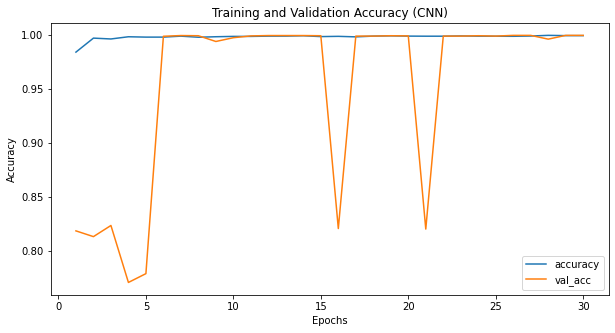

In [99]:
plt.figure(figsize=(10, 5))
plt.title('Training and Validation Accuracy (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_acc')
plt.legend()

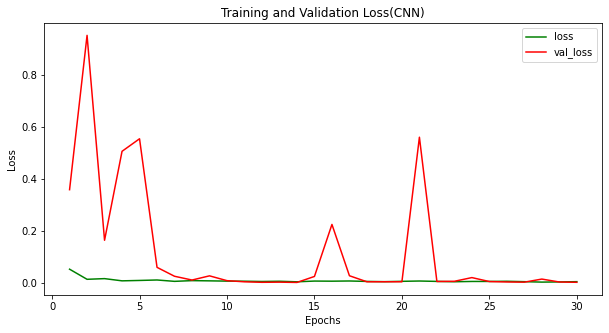

In [100]:
plt.figure(figsize=(10, 5))
plt.title('Training and Validation Loss(CNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, label='loss', color='g')
plt.plot(epochs, val_loss, label='val_loss', color='r')
plt.legend()

In [101]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [102]:
def classif_results(): 
    conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print('Confusion matrix:\n', conf_mat)
    labels = ['Class 0', 'Class 1', 'Class 2']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('Expected')
    plt.show()

    print("Accuracy", metrics.accuracy_score(y_test, y_pred))

    from sklearn.metrics import classification_report
    print(classification_report(y_test, y_pred))
    

   

In [103]:
def test_scale():
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)
    from sklearn.preprocessing import StandardScaler
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)

In [104]:
#df = df.drop(columns = ["Timestamp", "proto","PSH Flag Cnt","Init Fwd Win Byts","Flow Byts/s","Flow Pkts/s"], axis=1)

In [105]:
X = df.iloc[:, df.columns != 'fdia_category']
y = df.iloc[:, df.columns == 'fdia_category']

In [106]:
y

,attack
0,0
1,0
2,0
3,0
4,0
...,...
1048570,0
1048571,0
1048572,0
1048573,0


In [107]:
df['fdia_category'].value_counts(), X, y.value_counts()

(0    663808
 1    193354
 2    187589
 Name: attack, dtype: int64,
          Fwd Seg Size Min  Bwd Pkts/s   Flow Pkts/s    Fwd Pkts/s  \
 0                       0    0.000000      0.026633      0.026633   
 1                       0    0.000000      0.026633      0.026633   
 2                       0    0.000000      0.026634      0.026634   
 3                      32    1.549435      3.873587      2.324152   
 4                      32    1.249423      2.839597      1.590174   
 ...                   ...         ...           ...           ...   
 1048570                20    0.492272      0.984544      0.492272   
 1048571                20    0.000000  17094.017090  17094.017090   
 1048572                20    0.196258      0.785032      0.588774   
 1048573                20    0.191003      0.764013      0.573010   
 1048574                20    0.688793      1.721984      1.033190   
 
          Init Fwd Win Byts  URG Flag Cnt  Fwd Act Data Pkts  PSH Flag Cnt  \
 0          

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [109]:
sc_X = StandardScaler()

In [110]:
X_train = sc_X.fit_transform(X_train)

In [111]:
X_test = sc_X.transform(X_test)

In [112]:
lr_classifier = LogisticRegression()

In [113]:
lr_classifier.fit(X_train,y_train)

s:\anacondaprogramdata\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
s:\anacondaprogramdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [114]:
y_pred = lr_classifier.predict(X_test)

C:\Users\kanna\AppData\Local\Temp\ipykernel_11288\1457143942.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)


Confusion matrix:
 [[265609     92      8]
 [     0  77279      0]
 [     1     11  74901]]


C:\Users\kanna\AppData\Local\Temp\ipykernel_11288\1457143942.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


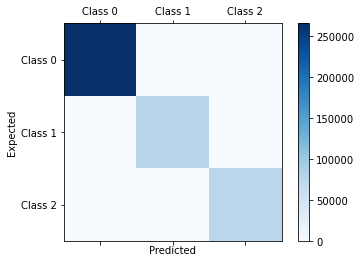

Accuracy 0.9997319939411488
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    265709
           1       1.00      1.00      1.00     77279
           2       1.00      1.00      1.00     74913

    accuracy                           1.00    417901
   macro avg       1.00      1.00      1.00    417901
weighted avg       1.00      1.00      1.00    417901



In [115]:
classif_results()

In [116]:
test_scale()

In [117]:
dt_classifier = DecisionTreeClassifier()

In [118]:
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [119]:
y_pred = dt_classifier.predict(X_test)

Confusion matrix:
 [[265709      0      0]
 [     0  77279      0]
 [     0     11  74902]]


C:\Users\kanna\AppData\Local\Temp\ipykernel_11288\1457143942.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\kanna\AppData\Local\Temp\ipykernel_11288\1457143942.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


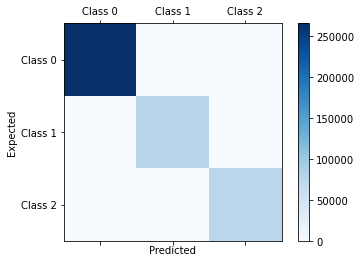

Accuracy 0.9999736779763628
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    265709
           1       1.00      1.00      1.00     77279
           2       1.00      1.00      1.00     74913

    accuracy                           1.00    417901
   macro avg       1.00      1.00      1.00    417901
weighted avg       1.00      1.00      1.00    417901



In [120]:
classif_results()

In [121]:
test_scale()

In [122]:

from sklearn import tree

In [123]:
classifier = RandomForestClassifier()

In [124]:
classifier.fit(X_train, y_train)

C:\Users\kanna\AppData\Local\Temp\ipykernel_11288\3959894982.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


RandomForestClassifier()

In [125]:
y_pred = classifier.predict(X_test)

Confusion matrix:
 [[265709      0      0]
 [     0  77279      0]
 [     0     11  74902]]


C:\Users\kanna\AppData\Local\Temp\ipykernel_11288\1457143942.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\kanna\AppData\Local\Temp\ipykernel_11288\1457143942.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


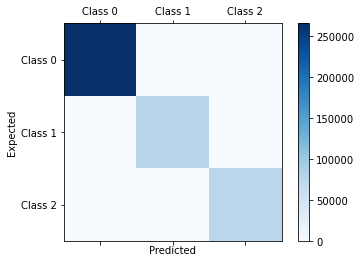

Accuracy 0.9999736779763628
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    265709
           1       1.00      1.00      1.00     77279
           2       1.00      1.00      1.00     74913

    accuracy                           1.00    417901
   macro avg       1.00      1.00      1.00    417901
weighted avg       1.00      1.00      1.00    417901



In [126]:
classif_results()

In [127]:
test_scale()

In [128]:
classifier = KNeighborsClassifier()

In [129]:
classifier.fit(X_train,y_train)

s:\anacondaprogramdata\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
classif_results()

In [ ]:
test_scale()

In [ ]:
classifier = SVC()

In [ ]:
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
classif_results()

In [ ]:
test_scale()

In [ ]:
classifier = GaussianNB()

In [ ]:
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
classif_results()